# Computer infrastructure: Assessment

Assessment project for the course "Computer Infrastruture" of the Higher Diploma of Science in Computing for Data Analytics, ATU Galway-Mayo, 2025/2026. 

## Module import

In [2]:
# import libraries 
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import re 

## Problem 1: Data from yfinance

**About yfinance** 

Yfinance is a python library that pulls data from the Yahoo Finance API and makes it availale and ready-to-use within python code. The package is not officially linked to the Yahoo Finance organization, but the is updated with regular commits. 

The package can be installed from here: https://pypi.org/project/yfinance/. Documentation can be found here: https://ranaroussi.github.io/yfinance/index.html

### Get_data()

The function get_data() is created to pull hourly data from the past five days for the FAANG stocks (Facebook/Meta, Apple, Amazon, Netflix, Google). 


In [3]:
# create variable for the FAANG stocks: META, AAPL, AMZN, NFLX, GOOG. 
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# show ticker object
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [5]:
# create function to get hourly data from the past 5 days for the FAANG stocks. 
def get_data(tickers): 
    # yfinance.download: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download 
    df_with_intervals = tickers.download(period='5d', interval='60m')

    # Verify if a data folder exists, and if not, create one. 
    # See: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories 
    if not os.path.exists('data'):
        os.makedirs('data')
    
    # save dataframe to csv
    # set path to folder 
    folder_path = 'data/'
    # set file name with time and date. See: https://www.w3schools.com/python/python_datetime.asp
    file_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv'

    full_path = folder_path + file_name

    # save dataframe to csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.htm
    df_with_intervals.to_csv(full_path)

In [6]:
# execute the function 
get_data(tickers)

[*********************100%***********************]  5 of 5 completed


**About yfinance.download()**

The download method allows to dowload market information for a or multiple ticker objects (the variable *tickers*, in this case). Among the possible arguments, the method allows to select specific periods of time and interval. The output is a table, which is data represented in a tabular format. 

In this case, the variable **df_with_intervals** is a table where each row corresponds to one-hour intervals in the past 5 (working) days. Hourly intervals are pulled only during the opening hours of the stock market (13:30-19:30). Each column displays, for every stock, the following data: 

- Close
- Dividends 
- High
- Low
- Open
- Stock Splits
- Volume 

## Problem 2: Plotting the data



In this section, the most recent data saved is plotted. 

The package os is used to find the most recent file in the data folder, based on the timestamp in the name. 


In [10]:
# List all files in the data folder (see: https://www.geeksforgeeks.org/python/python-os-listdir-method/)
tickers_data = os.listdir('data')
# select the most recent file (see: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)
latest_tickers_data = max(tickers_data)

The most recent data downloaded from Yahoo Finance and saved to a .csv file is opened as a Pandas dataframe. Pandas allows to read different types of strucutred data (including tabular data and json data), manipulate and plot it. 

In [14]:
# import the data from csv to pandas dataframe 
# the first 3 rows are read as headers: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# datetime is used as index. 
df_latest_tickers = pd.read_csv('data/' + latest_tickers_data, header=[0,1], index_col=0, parse_dates=True)

df_latest_tickers.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-20 14:30:00+00:00  273.904999  226.410004  304.820007  602.340027   
2025-11-20 15:30:00+00:00  271.779999  223.740005  300.279999  593.700012   
2025-11-20 16:30:00+00:00  268.940002  219.460007  295.269989  587.426025   
2025-11-20 17:30:00+00:00  268.809998  219.833893  295.619995  589.359985   
2025-11-20 18:30:00+00:00  267.795013  219.570007  292.785004  586.578125   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-11-20 14:30:00+00:00  109.169998       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 15:30:00+00:00  108.315002       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 16:30:00+00:00  107.440002       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 17:30:00+00:00  107.169998       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 18:30:00+00:00  106.644997       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits                       Volume           \
Ticker                            AAPL AMZN GOOG META NFLX     AAPL     AMZN   
Datetime                                                                       
2025-11-20 14:30:00+00:00          0.0  0.0  0.0  0.0  0.0  7869887  8016557   
2025-11-20 15:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2856925  4194011   
2025-11-20 16:30:00+00:00          0.0  0.0  0.0  0.0  0.0  4056106  5394259   
2025-11-20 17:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2981937  3824849   
2025-11-20 18:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2392389  2860937   

Price                                                 
Ticker                        GOOG     META     NFLX  
Datetime                                              
2025-11-20 14:30:00+00:00  7757273  4099749  5888910  
2025-11-20 15:30:00+00:00  3630221  1770337  3127305  
2025-11-20 16:30:00+00:00  3672872  1796868  3165668  
2025-11-20 17:30:00+00:00  2720625  1466496  2154562  
2025-11-20 18:30:00+00:00  2175912  1056949  1881617  

[5 rows x 35 columns]

In [16]:
# list colums 
headers = list(df_latest_tickers)

headers

[('Close', 'AAPL'),
 ('Close', 'AMZN'),
 ('Close', 'GOOG'),
 ('Close', 'META'),
 ('Close', 'NFLX'),
 ('Dividends', 'AAPL'),
 ('Dividends', 'AMZN'),
 ('Dividends', 'GOOG'),
 ('Dividends', 'META'),
 ('Dividends', 'NFLX'),
 ('High', 'AAPL'),
 ('High', 'AMZN'),
 ('High', 'GOOG'),
 ('High', 'META'),
 ('High', 'NFLX'),
 ('Low', 'AAPL'),
 ('Low', 'AMZN'),
 ('Low', 'GOOG'),
 ('Low', 'META'),
 ('Low', 'NFLX'),
 ('Open', 'AAPL'),
 ('Open', 'AMZN'),
 ('Open', 'GOOG'),
 ('Open', 'META'),
 ('Open', 'NFLX'),
 ('Stock Splits', 'AAPL'),
 ('Stock Splits', 'AMZN'),
 ('Stock Splits', 'GOOG'),
 ('Stock Splits', 'META'),
 ('Stock Splits', 'NFLX'),
 ('Volume', 'AAPL'),
 ('Volume', 'AMZN'),
 ('Volume', 'GOOG'),
 ('Volume', 'META'),
 ('Volume', 'NFLX')]

In [27]:
# Create a new "Date" column to reformat datetime index to remove timezone & seconds
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html 
df_latest_tickers['Date'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d{2}:\d{2}').str[0]
# Create a Close_datetime to capture only EOD close price (at 19:30)
df_latest_tickers['Close_datetime'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d[9]:\d{2}').str[0].fillna(' ')

# show new columns
df_latest_tickers.head(6)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-20 14:30:00+00:00  273.904999  226.410004  304.820007  602.340027   
2025-11-20 15:30:00+00:00  271.779999  223.740005  300.279999  593.700012   
2025-11-20 16:30:00+00:00  268.940002  219.460007  295.269989  587.426025   
2025-11-20 17:30:00+00:00  268.809998  219.833893  295.619995  589.359985   
2025-11-20 18:30:00+00:00  267.795013  219.570007  292.785004  586.578125   
2025-11-20 19:30:00+00:00  267.320007  219.070007  292.049988  588.599976   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-11-20 14:30:00+00:00  109.169998       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 15:30:00+00:00  108.315002       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 16:30:00+00:00  107.440002       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 17:30:00+00:00  107.169998       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 18:30:00+00:00  106.644997       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-20 19:30:00+00:00  106.389999       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-11-20 14:30:00+00:00          0.0  0.0  0.0  7869887  8016557  7757273   
2025-11-20 15:30:00+00:00          0.0  0.0  0.0  2856925  4194011  3630221   
2025-11-20 16:30:00+00:00          0.0  0.0  0.0  4056106  5394259  3672872   
2025-11-20 17:30:00+00:00          0.0  0.0  0.0  2981937  3824849  2720625   
2025-11-20 18:30:00+00:00          0.0  0.0  0.0  2392389  2860937  2175912   
2025-11-20 19:30:00+00:00          0.0  0.0  0.0  2094448  2569420  1586231   

Price                                                    Date  \
Ticker                        META     NFLX                     
Datetime                                                        
2025-11-20 14:30:00+00:00  4099749  5888910  2025-11-20 14:30   
2025-11-20 15:30:00+00:00  1770337  3127305  2025-11-20 15:30   
2025-11-20 16:30:00+00:00  1796868  3165668  2025-11-20 16:30   
2025-11-20 17:30:00+00:00  1466496  2154562  2025-11-20 17:30   
2025-11-20 18:30:00+00:00  1056949  1881617  2025-11-20 18:30   
2025-11-20 19:30:00+00:00  1248678  1980984  2025-11-20 19:30   

Price                        Close_datetime  
Ticker                                       
Datetime                                     
2025-11-20 14:30:00+00:00                    
2025-11-20 15:30:00+00:00                    
2025-11-20 16:30:00+00:00                    
2025-11-20 17:30:00+00:00                    
2025-11-20 18:30:00+00:00                    
2025-11-20 19:30:00+00:00  2025-11-20 19:30  

[6 rows x 37 columns]

In [29]:
# Create a subset for EOD data  (19:30) only 
eod_tickers = df_latest_tickers[df_latest_tickers['Close_datetime'] != ' ']
# remove time from "Date" to keep day only 
eod_tickers.loc[:,('Date')] = eod_tickers['Date'].replace(to_replace=' .+$', value='', regex=True)

eod_tickers.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-20 19:30:00+00:00  267.320007  219.070007  292.049988  588.599976   
2025-11-21 19:30:00+00:00  271.369995  220.184998  299.945007  594.070007   
2025-11-24 19:30:00+00:00  276.475006  226.099304  318.040009  615.005005   
2025-11-25 19:30:00+00:00  277.565002  229.490005  321.700104  633.650024   
2025-11-26 19:30:00+00:00  278.079987  229.429993  319.652008  634.205017   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-11-20 19:30:00+00:00  106.389999       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-21 19:30:00+00:00  104.925003       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-24 19:30:00+00:00  104.570000       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-25 19:30:00+00:00  104.493500       0.0  0.0  0.0  0.0  0.0  ...   
2025-11-26 19:30:00+00:00  105.864998       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-11-20 19:30:00+00:00          0.0  0.0  0.0  2094448  2569420  1586231   
2025-11-21 19:30:00+00:00          0.0  0.0  0.0  3135966  3265276  2460119   
2025-11-24 19:30:00+00:00          0.0  0.0  0.0  2989562  3160681  2438476   
2025-11-25 19:30:00+00:00          0.0  0.0  0.0  1909795  2204594  2028088   
2025-11-26 19:30:00+00:00          0.0  0.0  0.0  1953254  2275778  1298734   

Price                                              Date    Close_datetime  
Ticker                        META     NFLX                                
Datetime                                                                   
2025-11-20 19:30:00+00:00  1248678  1980984  2025-11-20  2025-11-20 19:30  
2025-11-21 19:30:00+00:00  1133638  2592012  2025-11-21  2025-11-21 19:30  
2025-11-24 19:30:00+00:00  1056339  2548591  2025-11-24  2025-11-24 19:30  
2025-11-25 19:30:00+00:00  1375502  1399600  2025-11-25  2025-11-25 19:30  
2025-11-26 19:30:00+00:00   736714  1436535  2025-11-26  2025-11-26 19:30  

[5 rows x 37 columns]

In [ ]:
# Plot hourly close price 

def plot_close_price(date, close_price):

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(date, close_price)
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Close Price (USD)')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
    ax.set_xticks(date, labels = date, rotation = 'vertical') 

    ax.set_title('FAANG Stocks - Close price over last 5 days')

    # show plot 
    plt.show()

    # save plot 
    image_name = latest_tickers_data.strip('.csv') + '.png'
    plt.savefig("images/"+ image_name, dpi=100)

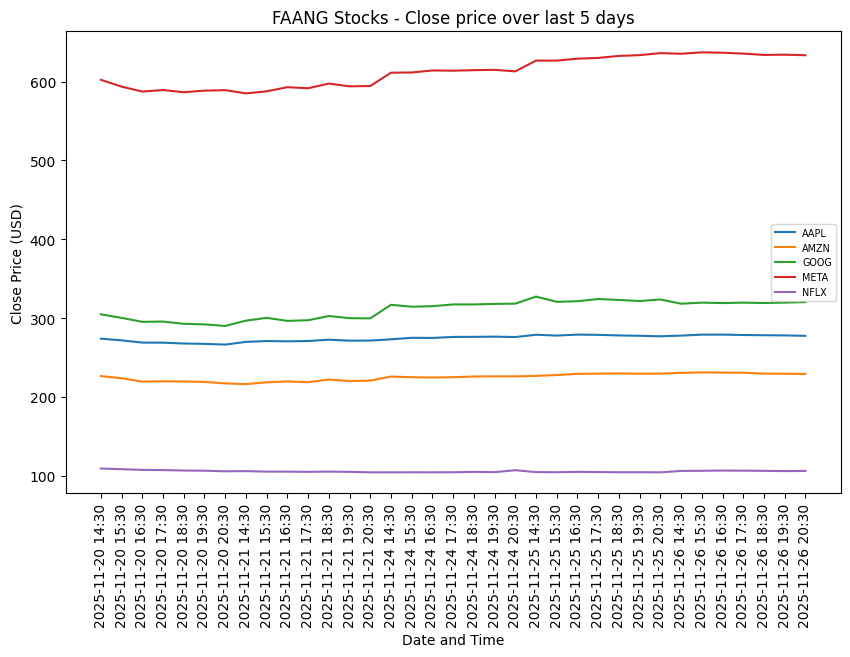

<Figure size 640x480 with 0 Axes>

In [46]:
# get subset for closing prices 
close_price = df_latest_tickers['Close']
# get index (date and time)
date = df_latest_tickers['Date']

# execute the function 
plot_close_price(df_latest_tickers['Date'], df_latest_tickers['Close'])

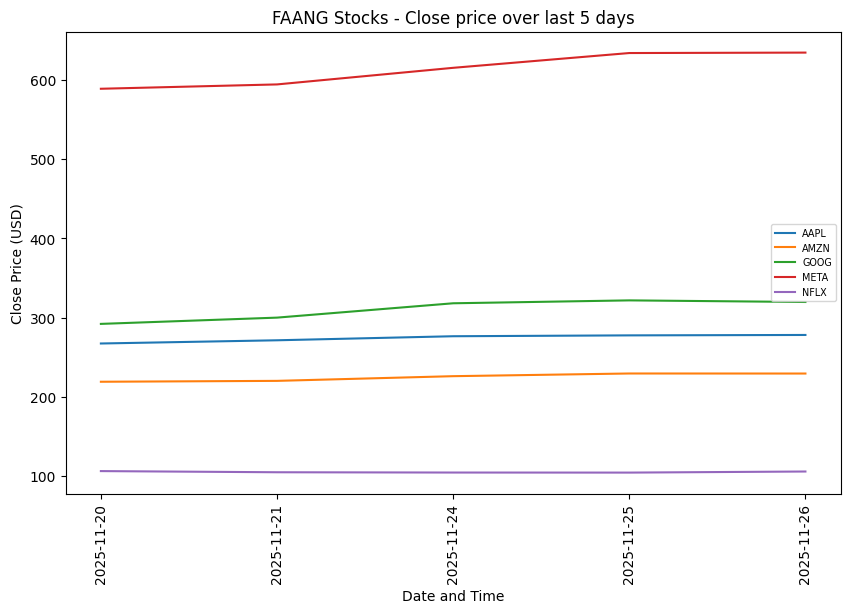

In [48]:
# [REMOVE]
# Plot EOD close price 

# get subset for closing prices 
close_price = eod_tickers['Close']
# get index (date and time)
eod_date = eod_tickers['Date']

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(eod_date, close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(eod_date, labels = eod_date, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')

plt.show()








In [ ]:
# Plot EOD close price in subplots 

# See: https://chatgpt.com/share/6910e526-a2d0-800f-be66-94ac6a06bf9c 
# To add: percentage variation in value at EOD close price

# Create arrays for variables
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]



In [59]:

def plot_close_price_subplots(data, titles):
# Put data and titles in lists for easy looping

    # Create subplots: 2 rows, 3 columns, but we'll hide the last (empty) one
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))

    # Flatten the 2D array of axes for easy iteration
    axs = axs.flatten()

    # Plot each stock
    for i, (ax, series, title) in enumerate(zip(axs, data, titles)):
        ax.plot(eod_date, series)
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=90)

    # Hide the last unused subplot (the 6th one)
    axs[-1].set_visible(False)

    # Adjust spacing between plots
    fig.tight_layout(pad=3.0)

    plt.show()# save image 
    image_name = latest_tickers_data.strip('.csv') + '_subplots.png'
    plt.savefig("images/"+ image_name)

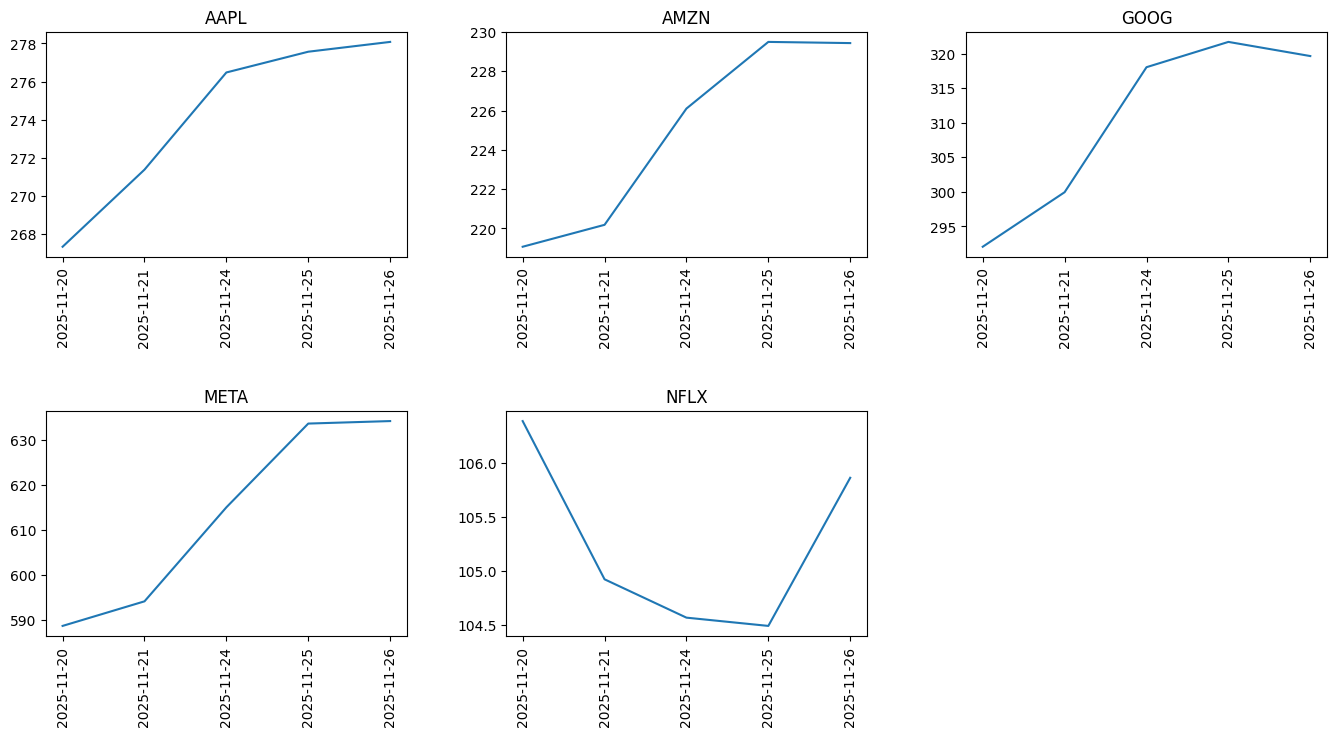

<Figure size 640x480 with 0 Axes>

In [60]:
plot_close_price_subplots(data, titles)